In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Generar datos de ejemplo
np.random.seed(0)
data = pd.DataFrame({
    'feature1': np.random.normal(size=100),
    'feature2': np.random.normal(size=100),
    'target': np.random.binomial(1, 0.5, size=100)
})

# Separar variables independientes y dependientes
X = data[['feature1', 'feature2']]
y = data['target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo K-NN con K=3
knn = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo
knn.fit(X_train, y_train)

# Hacer predicciones
y_pred = knn.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.5
Confusion Matrix:
[[10  9]
 [ 6  5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.53      0.57        19
           1       0.36      0.45      0.40        11

    accuracy                           0.50        30
   macro avg       0.49      0.49      0.49        30
weighted avg       0.53      0.50      0.51        30



In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Generar datos de ejemplo
np.random.seed(0)
data = pd.DataFrame({
    'feature1': np.random.normal(size=100),
    'feature2': np.random.normal(size=100),
    'target': np.random.binomial(1, 0.5, size=100)
})

# Separar variables independientes y dependientes
X = data[['feature1', 'feature2']]
y = data['target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir el modelo K-NN y los parámetros para GridSearch
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': range(1, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Búsqueda de hiperparámetros usando GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Mejor conjunto de parámetros
best_params = grid_search.best_params_
print(f'Mejor conjunto de parámetros: {best_params}')

# Entrenar el modelo con los mejores parámetros
best_knn = grid_search.best_estimator_
best_knn.fit(X_train, y_train)

# Hacer predicciones
y_pred = best_knn.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Mejor conjunto de parámetros: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Accuracy: 0.6
Confusion Matrix:
[[12  7]
 [ 5  6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.63      0.67        19
           1       0.46      0.55      0.50        11

    accuracy                           0.60        30
   macro avg       0.58      0.59      0.58        30
weighted avg       0.62      0.60      0.61        30



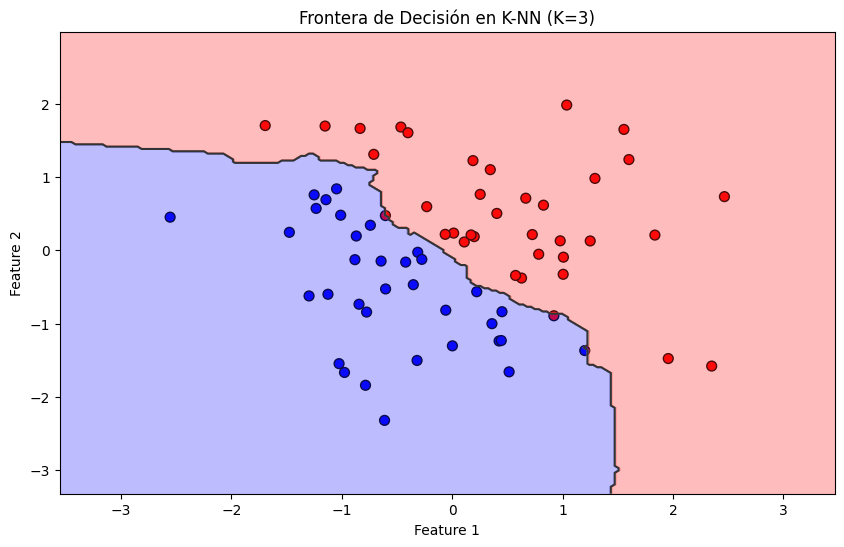

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Generar datos de ejemplo
np.random.seed(0)
n_samples = 100
X = np.random.randn(n_samples, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # La clase depende de la suma de las dos características

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear y entrenar el modelo K-NN con K=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Crear un grid de valores para graficar la frontera de decisión
xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 200),
                     np.linspace(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = knn.predict(grid).reshape(xx.shape)

# Graficar los datos y la frontera de decisión
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolor='k', s=50)
plt.contourf(xx, yy, probs, alpha=0.3, cmap='bwr')
plt.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)

plt.title('Frontera de Decisión en K-NN (K=3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()